# Chapter 2. Pytorch

## Basic Operation

## 0. Preparing

In [2]:
# These are the libraries will be used for this lab.

import torch
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [ ]:
torch.tensor?

## 1. Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data (see Bridge with NumPy). Tensors are also optimized for automatic differentiation (we’ll see more about that later in the Autograd section). If you’re familiar with ndarrays, you’ll be right at home with the Tensor API. If not, follow along!





### 데이터 타입에 따른 dtype / tensor 정리   
[pytorch 공식사이트 : TORCH.TENSOR](https://pytorch.org/docs/stable/tensors.html)  
  
| datatype | dtype | CPU tensor | GPU tensor|  
| :-: | :-: | :-: | :-: |  
|32bit float | `torch.float32` or `torch.float` | `torch.FloatTensor` | `torch.cuda.FloatTensor`|  
|64bit float | `torch.float64` or `torch.double` | `torch.DoubleTensor` | `torch.cuda.DoubleTensor`|  
|16bit float | `torch.float16` or `torch.half`  | `torch.HalfTensor` | `torch.cuda.HalfTensor`|  
|32bit int | `torch.int32` or `torch.int` | `torch.IntTensor` | `torch.cuda.IntTensor`|  
|64bit int | `torch.int64` or `torch.long` | `torch.LongTensor` | `torch.cuda.LongTensor`|  
|16bit int | `torch.int16` or `torch.short` | `torch.ShortTensor` | `torch.cuda.Short`|

## 1.1. Initializing a Tensor

* Directly from data
* From a Numpy array
* With random or constant values

### 1.1.1. Directly from data

In [ ]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

### 1.1.2 From a NumPy array

In [ ]:
np_array = np.array(data)
x_np = torch.tensor(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

### 1.1.3 With random or constant values

In [ ]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(zeros_tensor)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


## 1.2. Attributes of a Tensor

Tensor attributes describe their shape, datatype, and the device on which they are stored.



In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


--------------




## 1.3. Operations on Tensors


Over 100 tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing,
indexing, slicing), sampling and more are
comprehensively described `here <https://pytorch.org/docs/stable/torch.html>`__.

Each of these operations can be run on the GPU (at typically higher speeds than on a
CPU). If you’re using Colab, allocate a GPU by going to Runtime > Change runtime type > GPU.

By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using
``.to`` method (after checking for GPU availability). Keep in mind that copying large tensors
across devices can be expensive in terms of time and memory!



In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

print(tensor)

Try out some of the operations from the list.
If you're familiar with the NumPy API, you'll find the Tensor API a breeze to use.




### 1.3.1 Standard numpy-like indexing and slicing:



In [ ]:
tensor = torch.rand([4, 4])
tensor

tensor([[0.8798, 0.3402, 0.3438, 0.7218],
        [0.1645, 0.1769, 0.2817, 0.3093],
        [0.7621, 0.6251, 0.6597, 0.9433],
        [0.4541, 0.2620, 0.4600, 0.2815]])

In [ ]:
print('First row: ', tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[:, -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([0.8798, 0.3402, 0.3438, 0.7218])
First column:  tensor([0.8798, 0.1645, 0.7621, 0.4541])
Last column: tensor([0.7218, 0.3093, 0.9433, 0.2815])
tensor([[0.8798, 0.0000, 0.3438, 0.7218],
        [0.1645, 0.0000, 0.2817, 0.3093],
        [0.7621, 0.0000, 0.6597, 0.9433],
        [0.4541, 0.0000, 0.4600, 0.2815]])


### 1.3.2 Joining tensors:
 You can use ``torch.cat`` to concatenate a sequence of tensors along a given dimension.
See also `torch.stack <https://pytorch.org/docs/stable/generated/torch.stack.html>`__,
another tensor joining op that is subtly different from ``torch.cat``.



In [ ]:
t1 = torch.cat([tensor, tensor], axis=0) #join a sequence of arrays along an existing axis.
print(t1.shape)
t2 = torch.cat([tensor, tensor], axis=1) #join a sequence of arrays along an existing axis.
print(t2.shape)


torch.Size([8, 4])
torch.Size([4, 8])


In [ ]:
t3 = torch.stack([tensor, tensor], axis=0) #Join a sequence of arrays along a new axis.
print(t3.shape)

t4 = torch.stack([tensor, tensor], axis=2) #Join a sequence of arrays along a new axis.
print(t4.shape)

torch.Size([2, 4, 4])
torch.Size([4, 4, 2])


## 1.3.3 Arithmetic operations




In [ ]:
# This computes the matrix multiplication between two tensors. y1, y2 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

print(y1)
print(y2)



tensor([[1.4132, 0.4648, 1.5781, 0.7608],
        [0.4648, 0.2021, 0.6030, 0.2914],
        [1.5781, 0.6030, 1.9058, 0.9151],
        [0.7608, 0.2914, 0.9151, 0.4971]])
tensor([[0.8114, 0.1091, 0.6419, 0.6242],
        [0.1438, 0.2098, 0.5018, 0.4153],
        [0.9825, 0.3892, 0.4958, 0.2456],
        [0.3931, 0.6129, 0.9296, 0.5375]])


In [ ]:
# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)
print(z1)

tensor([[0.7741, 0.0000, 0.1182, 0.5210],
        [0.0271, 0.0000, 0.0794, 0.0956],
        [0.5808, 0.0000, 0.4352, 0.8898],
        [0.2062, 0.0000, 0.2116, 0.0792]])


**Single-element tensors** If you have a one-element tensor, for example by aggregating all
values of a tensor into one value, you can convert it to a Python
numerical value using ``item()``:



In [ ]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

6.2615861892700195 <class 'float'>


--------------





## 1.4 Bridge with NumPy:


Tensors on the CPU and NumPy arrays can share their underlying memory
locations, and changing one will change	the other.



Tensor to NumPy array


In [ ]:
t = torch.ones(5)
print(t)
n = t.numpy()
print(n)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


A change in the tensor reflects in the NumPy array.



In [ ]:
t[3]=10
print(f"t: {t}")
print(f"n: {n}")

t: tensor([ 2.,  2.,  2., 10.,  2.])
n: [ 2.  2.  2. 10.  2.]


NumPy array to Tensor



In [3]:
n = np.ones(5)
t = torch.tensor(n)

Changes in the NumPy array reflects in the tensor.



In [6]:
n[1]=3
print(t)
print(n)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[1. 3. 1. 1. 1.]


# 2. Datasets and Dataloader

Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code
to be decoupled from our model training code for better readability and modularity.
PyTorch provides two data primitives: ``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``
that allow you to use pre-loaded datasets as well as your own data.
``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around
the ``Dataset`` to enable easy access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets (such as FashionMNIST) that
subclass ``torch.utils.data.Dataset`` and implement functions specific to the particular data.
They can be used to prototype and benchmark your model. You can find them
here: `Image Datasets <https://pytorch.org/vision/stable/datasets.html>`_,
`Text Datasets  <https://pytorch.org/text/stable/datasets.html>`_, and
`Audio Datasets <https://pytorch.org/audio/stable/datasets.html>`_




## 2.1 Loading a Dataset


Here is an example of how to load the `Fashion-MNIST <https://research.zalando.com/project/fashion_mnist/fashion_mnist/>`_ dataset from TorchVision.
Fashion-MNIST is a dataset of Zalando’s article images consisting of 60,000 training examples and 10,000 test examples.
Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.

We load the `FashionMNIST Dataset <https://pytorch.org/vision/stable/datasets.html#fashion-mnist>`_ with the following parameters:
 - ``root`` is the path where the train/test data is stored,
 - ``train`` specifies training or test dataset,
 - ``download=True`` downloads the data from the internet if it's not available at ``root``.
 - ``transform`` and ``target_transform`` specify the feature and label transformations



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision.transforms import ToTensor



training_data = datasets.FashionMNIST(
    root="/content/drive/MyDrive/Class/Programming\Group8_Pytorch/data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="/content/drive/MyDrive/Class/Programming\Group8_Pytorch/data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/Class/Programming\Group8_Pytorch/data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/Class/Programming\Group8_Pytorch/data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/Class/Programming\Group8_Pytorch/data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/Class/Programming\Group8_Pytorch/data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/Class/Programming\Group8_Pytorch/data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/Class/Programming\Group8_Pytorch/data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/Class/Programming\Group8_Pytorch/data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/Class/Programming\Group8_Pytorch/data/FashionMNIST/raw



## 2.2. Iterating and Visualizing the Dataset


We can index ``Datasets`` manually like a list: ``training_data[index]``.
We use ``matplotlib`` to visualize some samples in our training data.



9


torch.Size([1, 28, 28])

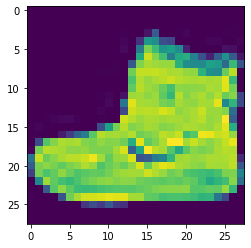

In [ ]:
img, label = training_data[0]
plt.imshow(img.squeeze())
print(label)
img.shape

In [ ]:
type(training_data)

torchvision.datasets.mnist.FashionMNIST

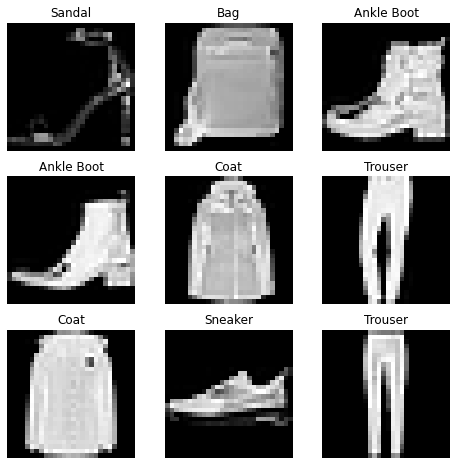

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

..
 .. figure:: /_static/img/basics/fashion_mnist.png
   :alt: fashion_mnist



--------------




## 2.3. Creating a Custom Dataset for your files
---------------------------------------------------



In [ ]:
import torch
from torch.utils.data import Dataset
torch.manual_seed(1)

In [ ]:
length=5
x= 2 * torch.rand([length, 2])
y= torch.sum(x, axis=1)
#+ torch.rand([length])

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

mydata = TensorDataset(x, y)


In [ ]:
mydata[1]

(tensor([0.8061, 1.4694]), tensor(2.2755))

In [ ]:
mydata[1:3][0]

tensor([[0.8061, 1.4694],
        [0.0586, 1.5997]])

In [ ]:
print("Value on index 0 of our toy_set object: ", mydata[0])

Value on index 0 of our toy_set object:  (tensor([1.5153, 0.5586]), tensor(2.0739))


In [ ]:
print("Our toy_set length: ", len(mydata))

Our toy_set length:  5


In [ ]:
XX, YY= mydata[0:3]
print(XX, YY)

tensor([[1.5153, 0.5586],
        [0.8061, 1.4694],
        [0.0586, 1.5997]]) tensor([2.0739, 2.2755, 1.6583])


In [ ]:
print(XX)
print(YY)

tensor([[1.5153, 0.5586],
        [0.8061, 1.4694],
        [0.0586, 1.5997]])
tensor([2.0739, 2.2755, 1.6583])


### Exercise 1:

You are given the following toy data:
```
Y= np.array([3.0, 2.1, 5.8])
X= np.array([[1.0, 0.1],
             [2.5, -0.5],
             [3.1, 0.7]])
```

Answer the following questions.

[1] Write the code to make Dataset object of X and Y in Pytorch.

[2] Write the code to retrieve first two lines of X from Dataset.

## 2.4 Dataloader

DataLoader란 Dataset을 batch기반의 딥러닝모델 학습을 위해서 미니배치 형태로 만들어서 우리가 실제로 학습할 때 이용할 수 있게 형태를 만들어주는 기능을 합니다. DataLoader를 통해 Dataset의 전체 데이터가 batch size로 slice되어 공급됩니다. DataLoader는 iterator 형식으로 데이터에 접근 하도록 하며 batch_size나 shuffle 유무를 설정할 수 있다. 다음은 일반적인 사용형식이다.
```
from torch.utils.data import Dataloader

dataloader = Dataloader(
      dataset,
    batch_size = 2,
    shuffle = True
```

In [ ]:
# Import libraries
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [ ]:
?torch.randint

In [ ]:
X = torch.rand([5,2])
Y = torch.randint(low=0, high=10, size=[5])
print(X,Y)


tensor([[0.3828, 0.7442],
        [0.5285, 0.6642],
        [0.6099, 0.6818],
        [0.7479, 0.0369],
        [0.7517, 0.1484]]) tensor([2, 2, 5, 5, 0])


In [ ]:
dataset = TensorDataset(X,Y)

In [ ]:
trainloader=DataLoader(dataset = dataset, batch_size=1, shuffle=False)

In [ ]:
for xx, yy in trainloader:
  print("xx=",xx, ",    yy=", yy)

xx= tensor([[0.3828, 0.7442]]) ,    yy= tensor([2])
xx= tensor([[0.5285, 0.6642]]) ,    yy= tensor([2])
xx= tensor([[0.6099, 0.6818]]) ,    yy= tensor([5])
xx= tensor([[0.7479, 0.0369]]) ,    yy= tensor([5])
xx= tensor([[0.7517, 0.1484]]) ,    yy= tensor([0])


In [ ]:
trainloader=DataLoader(dataset = dataset, batch_size=1, shuffle=True)

In [ ]:
for xx, yy in trainloader:
  print("xx=",xx, ",    yy=", yy)

xx= tensor([[0.7517, 0.1484]]) ,    yy= tensor([0])
xx= tensor([[0.3828, 0.7442]]) ,    yy= tensor([2])
xx= tensor([[0.6099, 0.6818]]) ,    yy= tensor([5])
xx= tensor([[0.7479, 0.0369]]) ,    yy= tensor([5])
xx= tensor([[0.5285, 0.6642]]) ,    yy= tensor([2])


In [ ]:
trainloader=DataLoader(dataset = dataset, batch_size=2, shuffle=False)

In [ ]:
for xx, yy in trainloader:
  print( yy)

tensor([2, 2])
tensor([5, 5])
tensor([0])


In [ ]:
trainloader=DataLoader(dataset = dataset, batch_size=2, shuffle=True)

In [ ]:
for xx, yy in trainloader:
  print("xx=",xx, ",    yy=", yy)

xx= tensor([[0.7140, 0.2676],
        [0.6397, 0.9743]]) ,    yy= tensor([3, 5])
xx= tensor([[0.9391, 0.4167],
        [0.0246, 0.2588]]) ,    yy= tensor([3, 5])
xx= tensor([[0.8300, 0.0444]]) ,    yy= tensor([9])
